# Dog Emotion Classification Model

Ariann Fernando Arriaga Alcántara A01703556

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556"
!ls

/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556
archivos  DogEmotionClassificationModel_A01703556.ipynb  test  train  validation


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Declaración de rutas para identificar las carpetas que contienen las imágenes
train_dir = 'train'
test_dir = 'test'
validation_dir = 'validation'


### Preprocesamiento de los datos usando data augmentation

ImageDataGenerator para la creación de imagenes modificadas para el entrenamiento del modelo

In [30]:
#Creación de los data generators para train, test y validation

train_datagen = ImageDataGenerator(
		 				# Sirve para modificar la imágen
							rescale = 1./255,
							rotation_range = 180,
						  width_shift_range = 0.3,
							height_shift_range = 0.3,
							shear_range = 0.1,
							zoom_range = 0.1,
							horizontal_flip = True)

test_datagen = ImageDataGenerator(1./255)

validation_datagen = ImageDataGenerator(1./255)


In [31]:
path = "/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556/files"

#Definición de las direcciones para los generators y sus atributos.
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 40,
							#batch_size = 2800,
							class_mode ='categorical',
							save_to_dir= path + '/augmented',
              save_prefix='aug',
              save_format='png'
							)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 600,
					class_mode= 'categorical')

validation_generator = validation_datagen.flow_from_directory(
					validation_dir,
					target_size = (150, 150),
					batch_size = 600,
					class_mode= 'categorical')



Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


Demostración del preprocesamiento con la generación de imágenes

(40, 150, 150, 3)


<Figure size 640x480 with 0 Axes>

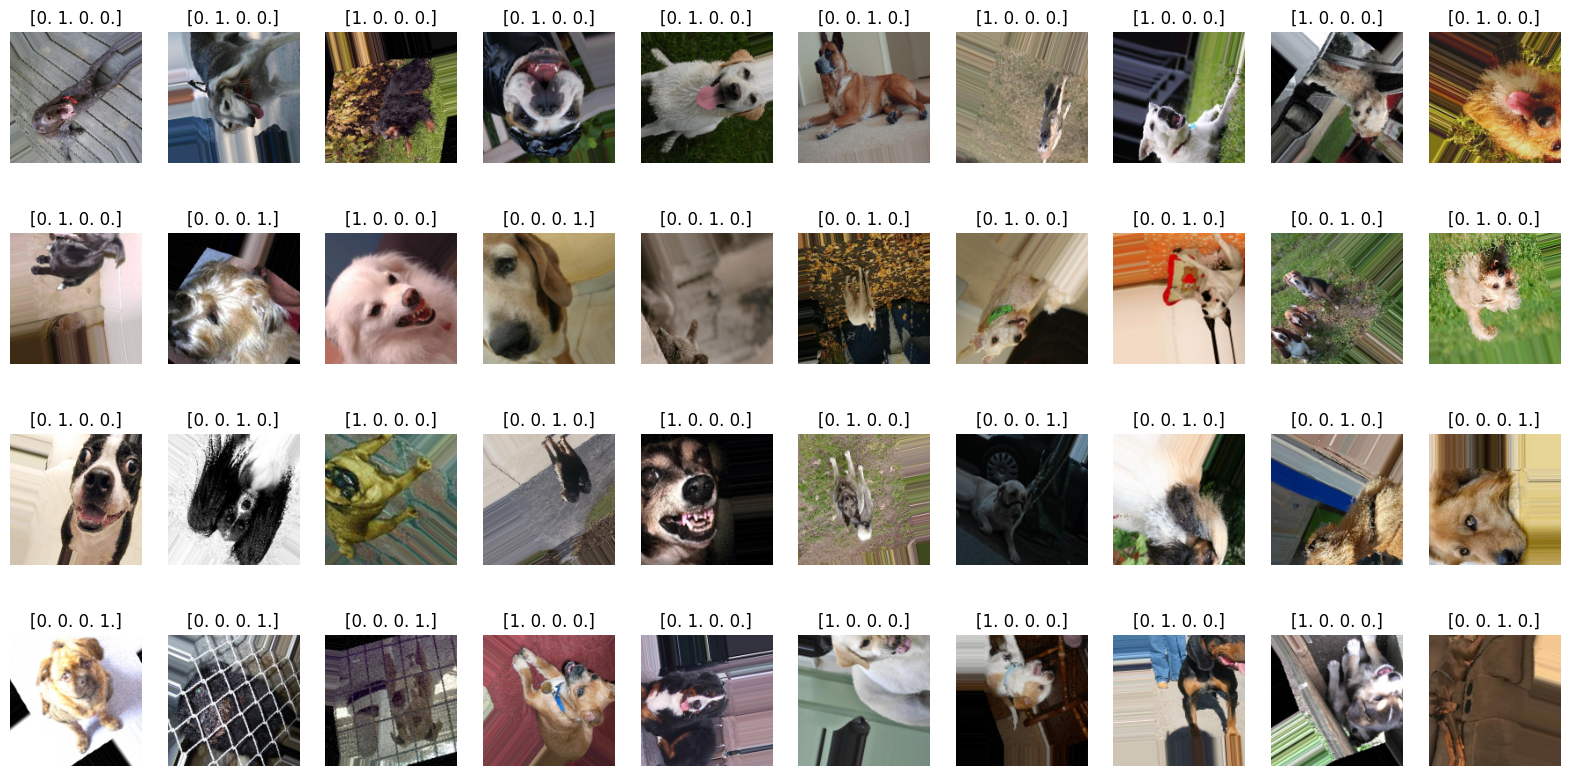

In [32]:
images , labels = train_generator[0]

print(images.shape)

numPerCol = 10
plt.figure()
f, axarr = plt.subplots(4, numPerCol, figsize=(20, 10))

#Desplegará las imágenes que contenga el batch generado
for i in range(images.shape[0]) :
  col = i % numPerCol
  row = i // numPerCol
  axarr[row, col].axis('off')
  axarr[row, col].set_title(str(labels[i]))
  axarr[row, col].imshow(images[i])